<span style="font-family:cursive; font-size:25px; color:Dark Blue;"> Data mining - House Price Prediction in R </span>



<span style="font-family:cursive; font-size:20px; color:Blue;">  Introduction </span>


House price prediction is crucial nowadays because it has practical applications in the real estate industry. Many have started real estate business but are they giving/getting the right/true information about the house? nowadays with AI generated models can predict the real price of the house based on the different features of the house.

I will go through the definition of the dataset, check if different features are correlated with each other and then will try to implement different regression models to see which model is the best to predict the price. Regression is  because price is a continous variable in this context.



<img src="https://www.rocketmortgage.com/resources-cmsassets/RocketMortgage.com/Article_Images/Large_Images/TypesOfHomes/types-of-homes-hero.jpg" width="400">

In [55]:
#Importing all the libraries that are used in this notebook

library(data.table)
library(corrplot)
library(leaflet)
library(maps)
library(leaflet)
library(ggplot2)
library(dplyr)
library(htmltools)
library(plotly)
library(htmlwidgets)
library(IRdisplay)
library(cluster)
library(forecast)
library(caret)
library(randomForest)
library(tidyr)
library(glmnet)
library(Matrix)
library(rpart)
library(lubridate)



In [2]:
data <- fread("/kaggle/input/housedata/data.csv")

Let's go through the data

In [3]:
head(data)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
<dttm>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
2014-05-02,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
2014-05-02,490000,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


What each columns represents:
1. price: price at which house was sold.
2. date: This shows date on which house was sold.
3. bedrooms: The number of bedrooms.
4. bathrooms: The number of bathrooms.
5. sqft\_living: living area of the house in square feet.
6. sqft\_lot: total area of the lot in square feet.
7. floors: number of floors in the house.
8. waterfront: binary variable indicating the house is on a waterfront or not.
9. view: How good the view of the property is  between 0 and 4.
10. condition: The condition of the house between 0 and 5.
11. sqft\_above: Apart from the basement The square footage of the house.
12. sqft\_basement: Square footage of the basement.
13. yr\_built: The year in which the house was built.
14. yr\_renovated: The year in which the house was renovated.
15. street: street address of the house.
16. city: The city of the house
17. statezip: The state and zipcode of the house where is located.
18. country: The country of houses (USA).

In [4]:
n_rows <- dim(data)[1]
n_columns <- dim(data)[2]

cat("Number of rows", n_rows, "\n")
cat("Number of columns", n_columns, "\n")

Number of rows 4600 
Number of columns 18 


In [5]:
colnames(data)

[1] "date"          "price"         "bedrooms"      "bathrooms"    
 [5] "sqft_living"   "sqft_lot"      "floors"        "waterfront"   
 [9] "view"          "condition"     "sqft_above"    "sqft_basement"
[13] "yr_built"      "yr_renovated"  "street"        "city"         
[17] "statezip"      "country"

Data has almost 4600 rows and 18 number of features which are date, price, bedrooms, bathrooms etc.

In [6]:
#Lets see the summary of the dataset
summary(data)

      date                         price             bedrooms    
 Min.   :2014-05-02 00:00:00   Min.   :       0   Min.   :0.000  
 1st Qu.:2014-05-21 00:00:00   1st Qu.:  322875   1st Qu.:3.000  
 Median :2014-06-09 00:00:00   Median :  460943   Median :3.000  
 Mean   :2014-06-07 03:14:42   Mean   :  551963   Mean   :3.401  
 3rd Qu.:2014-06-24 00:00:00   3rd Qu.:  654962   3rd Qu.:4.000  
 Max.   :2014-07-10 00:00:00   Max.   :26590000   Max.   :9.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  370   Min.   :    638   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1460   1st Qu.:   5001   1st Qu.:1.000  
 Median :2.250   Median : 1980   Median :   7683   Median :1.500  
 Mean   :2.161   Mean   : 2139   Mean   :  14852   Mean   :1.512  
 3rd Qu.:2.500   3rd Qu.: 2620   3rd Qu.:  11001   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1074218   Max.   :3.500  
   waterfront            view          condition       sqft_above  
 

The house is from the country USA

In [7]:
unique(data$country)

[1] "USA"

In [8]:
unique(data$city)

[1] "Shoreline"           "Seattle"             "Kent"               
 [4] "Bellevue"            "Redmond"             "Maple Valley"       
 [7] "North Bend"          "Lake Forest Park"    "Sammamish"          
[10] "Auburn"              "Des Moines"          "Bothell"            
[13] "Federal Way"         "Kirkland"            "Issaquah"           
[16] "Woodinville"         "Normandy Park"       "Fall City"          
[19] "Renton"              "Carnation"           "Snoqualmie"         
[22] "Duvall"              "Burien"              "Covington"          
[25] "Inglewood-Finn Hill" "Kenmore"             "Newcastle"          
[28] "Mercer Island"       "Black Diamond"       "Ravensdale"         
[31] "Clyde Hill"          "Algona"              "Skykomish"          
[34] "Tukwila"             "Vashon"              "Yarrow Point"       
[37] "SeaTac"              "Medina"              "Enumclaw"           
[40] "Snoqualmie Pass"     "Pacific"             "Beaux Arts Village" 
[43] "Preston"             "Milton"

All the above cities are from Washington state in USA, let's see how many are there from each city

In [9]:
data %>% 
  count(city, sort = TRUE) %>% 
  slice_head(n = 10)

city,n
<chr>,<int>
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Issaquah,187
Kirkland,187
Kent,185
Auburn,176
Sammamish,175


The map of Washington is shown in below graph

In [10]:
map_wa <- map("state", "washington",fill = TRUE, plot = FALSE)
map <- leaflet() %>% addTiles()
# add polygons for Washington state
map <- map %>% addPolygons(
  data = map_wa,
  fillColor = "blue",
  stroke = FALSE
)

map

HTML widgets cannot be represented in plain text (need html)

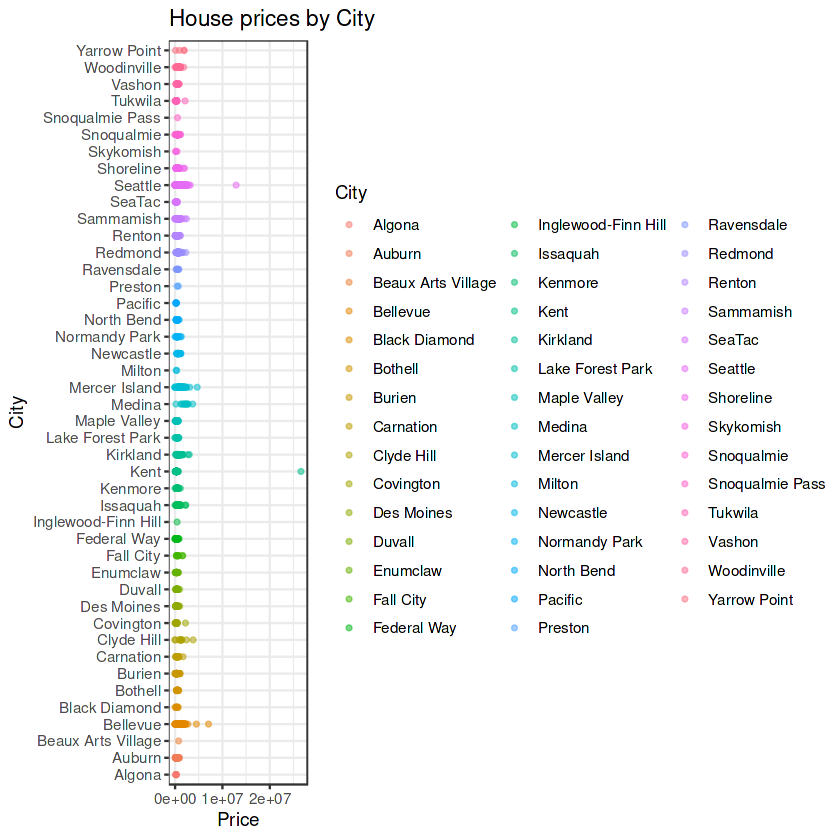

In [11]:
ggplot(data, aes(x = city, y = price, color = city)) +
  geom_point(size = 1, alpha = 0.5) +
  coord_flip() +
  labs(x = "City", y = "Price", color = "City") +
  ggtitle("House prices by City") +
  theme_bw()


In the next step let's try to find if there are any missing values in the dataset

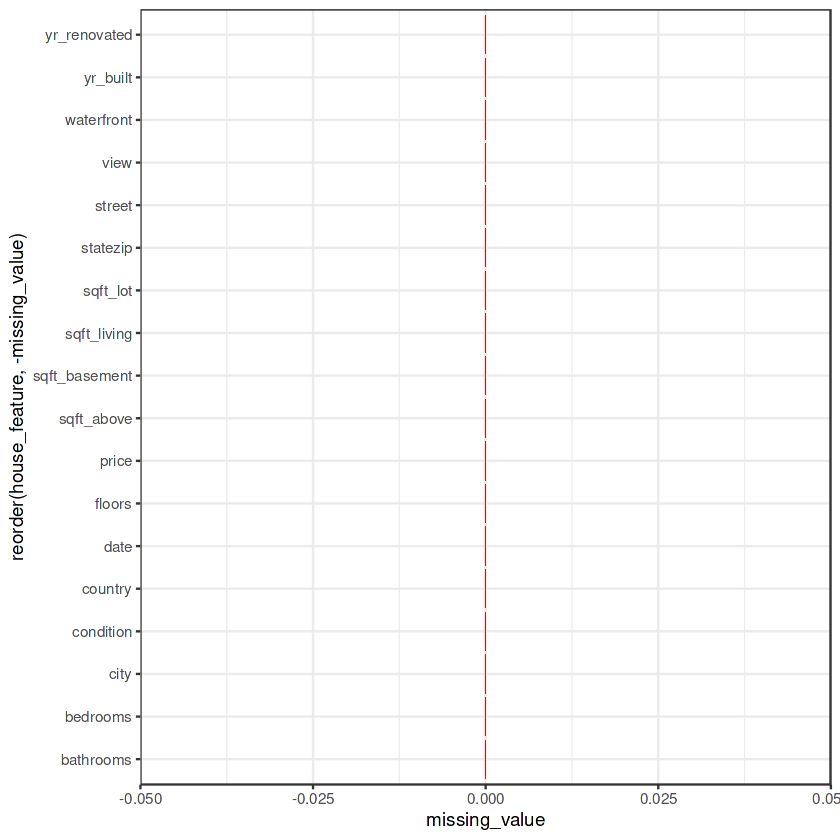

In [12]:
#Finding the missing values in each features
missing_values <- data %>% 
  summarise(across(everything(), ~ sum(is.na(.))/n())) %>% 
  gather(key = "house_feature", value = "missing_value")

#plotting them in the graph
missing_values %>% 
  ggplot(aes(x = reorder(house_feature, -missing_value), y = missing_value)) +
  geom_bar(stat = "identity", fill = "red") +
  coord_flip() +
  theme_bw()


It seems that this dataset does not have any missing values for any features


<span style="font-family:cursive; font-size:20px; color:Blue;">  Correlation between different features </span>

To find the correlation let us first define those features which are numeric

In [13]:
#finding the columns which has numeric values
numeric_cols <- sapply(data, is.numeric)

#to get comma seperated column names to apply in corrplot
cat(paste0('"',names(data)[numeric_cols], collapse = ", ",'"'))

"price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"

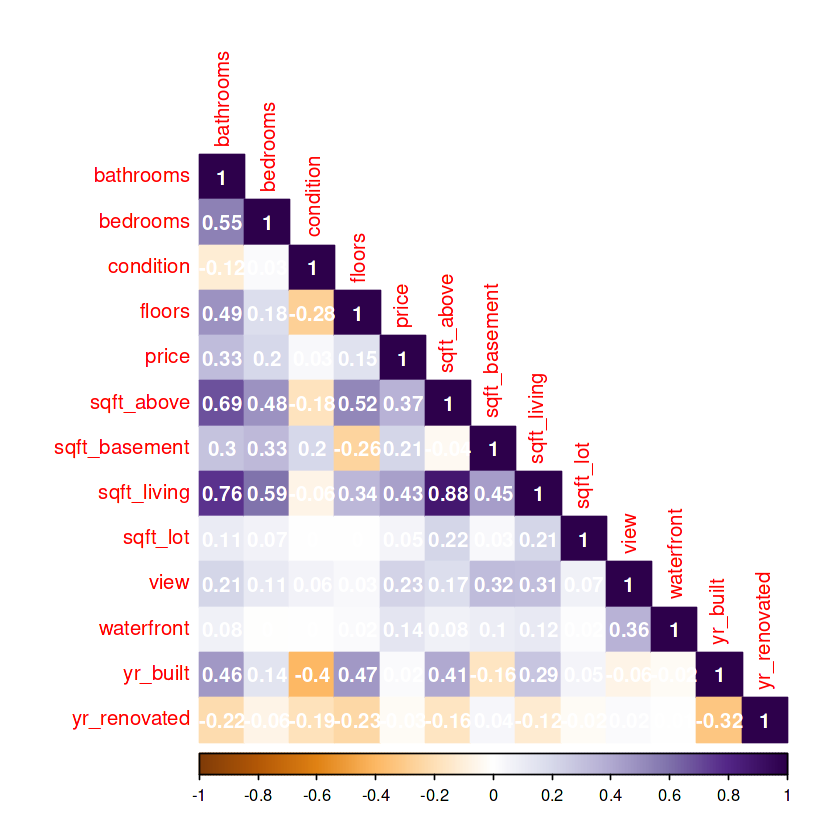

In [14]:
corrplot(cor(data[, c("price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"
                             )], use='pairwise.complete.obs'), method = 'color', order = 'alphabet',addCoef.col = 'white', col = COL2('PuOr'), type ='lower')

From the correlation matrix we can see a positive correlation between sqft_living and bathroom, sqft_living and sqft_above, and almost negative correlation between yr_built and condition we will plot them and check if it really has positive correlation

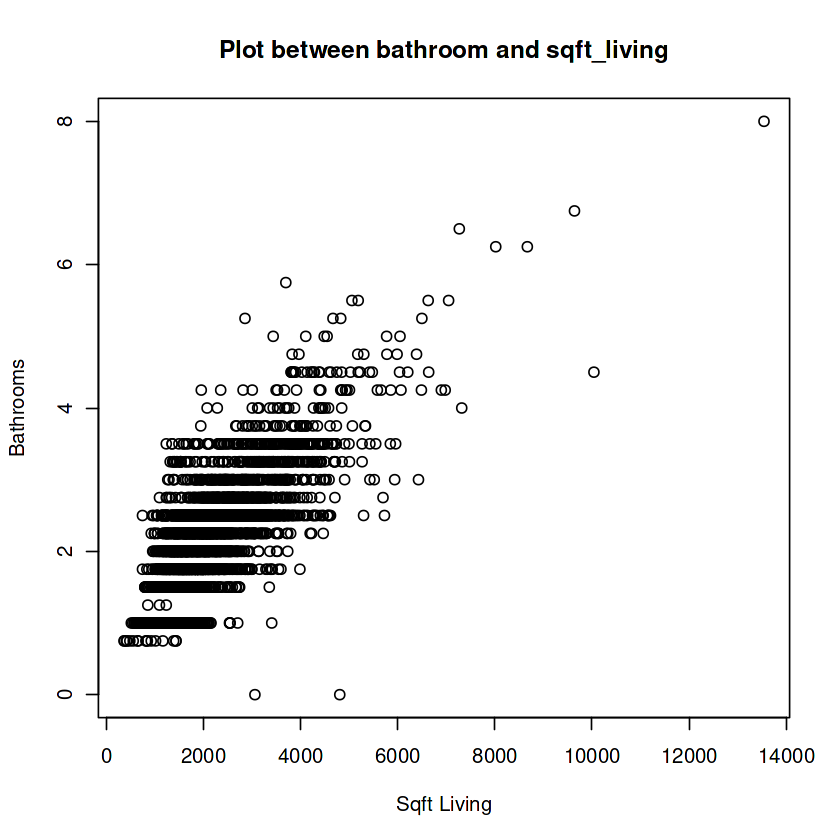

In [15]:
plot(data$sqft_living, data$bathrooms, xlab="Sqft Living", ylab="Bathrooms",  main = "Plot between bathroom and sqft_living")

The above graph is not clearly showing the relationship between them, so we can use **Linear Regression** to plot the correlation between these two features

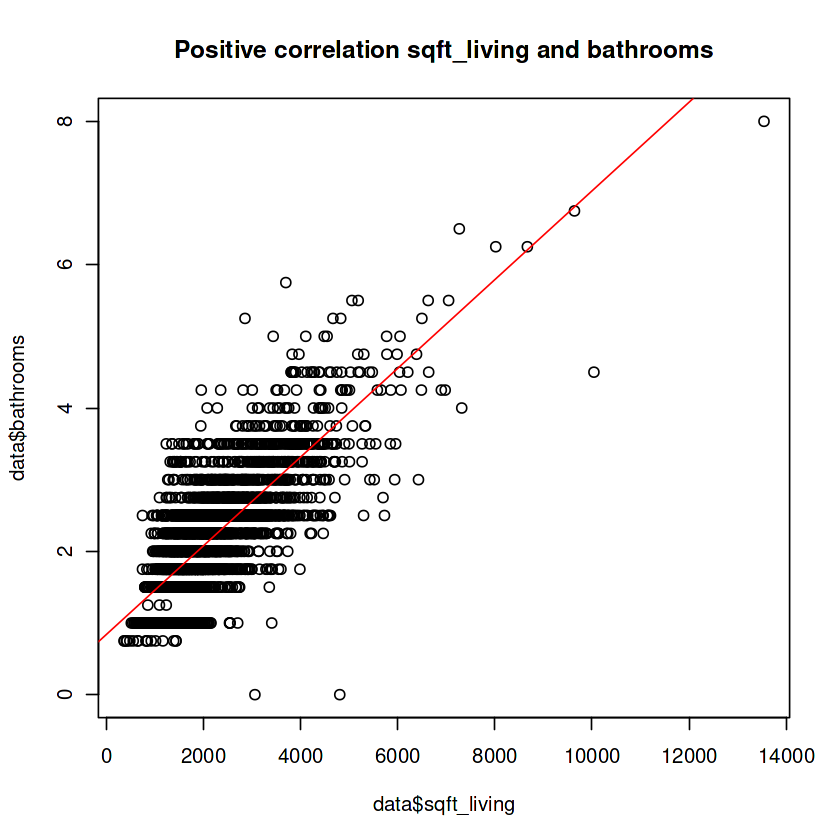

In [16]:
fit <- lm(bathrooms ~ sqft_living, data = data)

# scatterplot

plot(data$sqft_living, data$bathrooms, main = "Positive correlation sqft_living and bathrooms")
abline(fit, col = "red")


lm is thus used to plot the linear regression, the red line clearly shows that there is a positive correlation.

Also to check for negative correlation between year and condition.

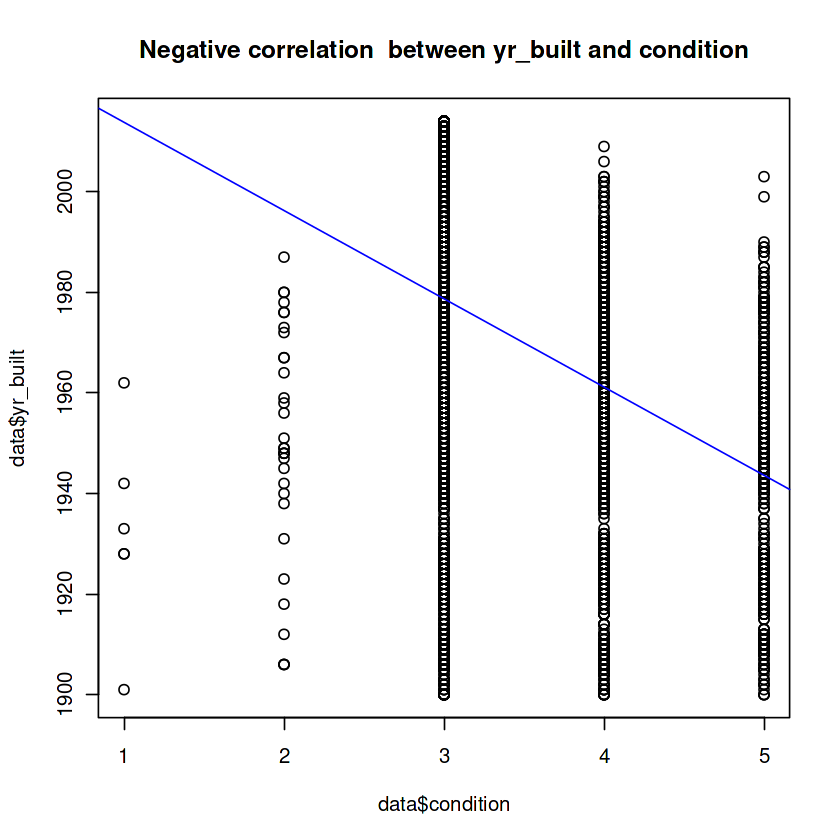

In [17]:
fit <- lm(yr_built ~ condition, data = data)

# scatterplot

plot(data$condition,data$yr_built, main = "Negative correlation  between yr_built and condition")
abline(fit, col = "blue")


**K Means clustering**


Using K means Clustering, to find the correlation between sqft_building and price

In [18]:
core <- data[,c("sqft_living", "price")]
data_scaled <- scale(core)

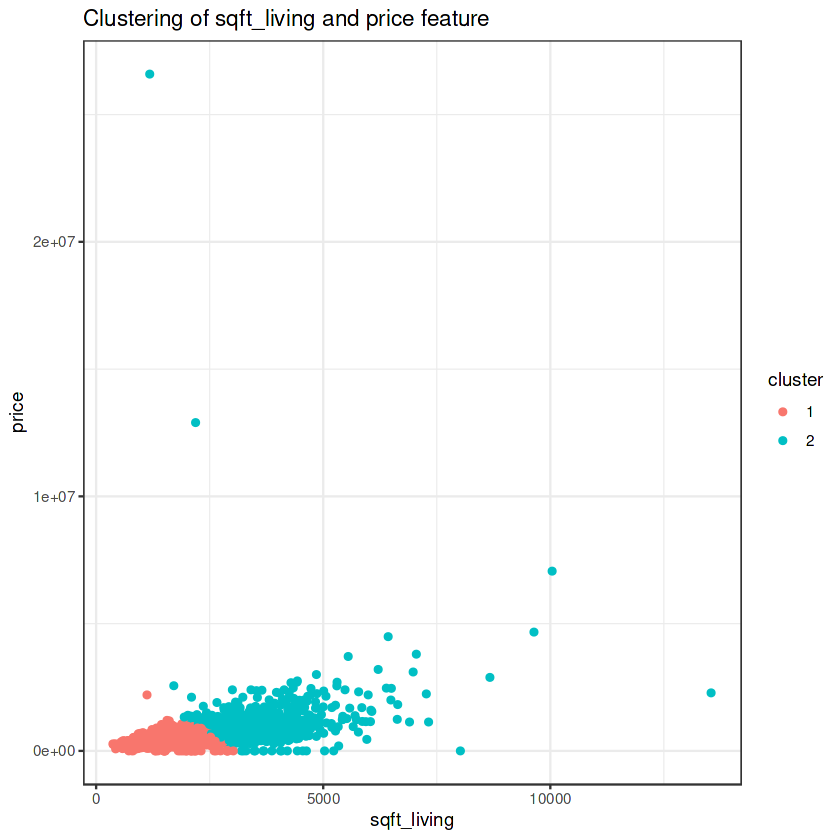

In [19]:
set.seed(123)
kmeans_fit <- kmeans(data_scaled, 2)

data$cluster <- as.factor(kmeans_fit$cluster)

# Visualize the clusters
ggplot(data, aes(x=sqft_living, y=price, color=cluster)) + 
  geom_point() +
  labs(title='Clustering of sqft_living and price feature', y='price', x='sqft_living') + 
  theme_bw()

From the above graph we can see that after doing K means clustering with K=2, two clusters are seperated, one might show for the houses with low sqft_living might have less price and for the one with higher sqft_living might have high price, we can also note that there are some outliers shown as a dot in the above graph. 

<span style="font-family:cursive; font-size:20px; color:Blue;">  Change of data over the years </span>

From which year the house was built and upto which year, we can see that next

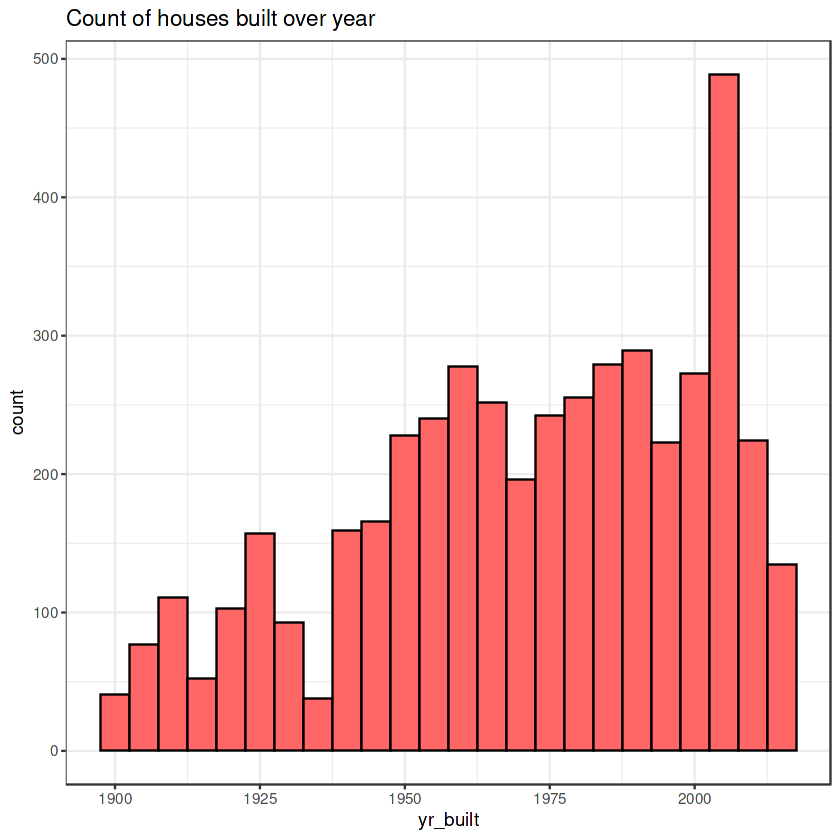

In [20]:
ggplot(data, aes(x=yr_built)) +
  geom_histogram(, binwidth=5, colour="black", fill="#FF6666")+labs(title = "Count of houses built over year") +theme_bw()


Most of the houses shown in the data were built in the year around 2000.

Let's see how the prices have changed over the years

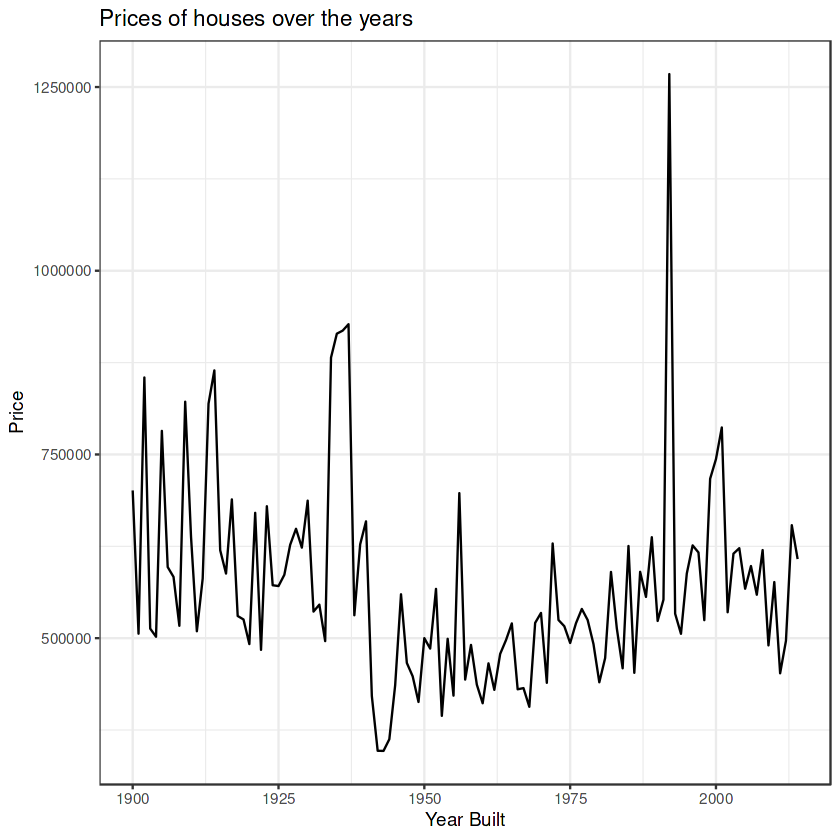

In [22]:
data %>%
  group_by(yr_built) %>%
  summarize(avg_price = mean(price)) %>%
  ggplot(aes(x = yr_built, y = avg_price)) +
  geom_line() +
  labs(x = "Year Built", y = "Price", title = "Prices of houses over the years" ) +
  theme_bw()


Surely, for the ones near the year 2000 have got high prices because at that time most of the houses were built.

We can now see the year where house were rebuilt or renovated

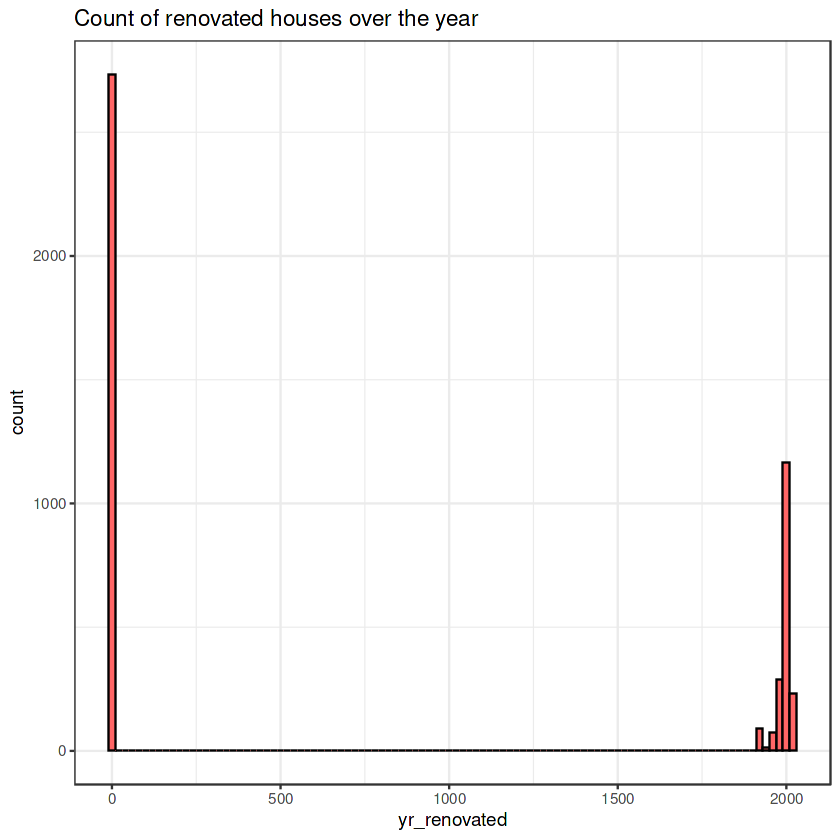

In [23]:
ggplot(data, aes(x=yr_renovated)) +
  geom_histogram(, binwidth=20, colour="black", fill="#FF6666")+labs(title="Count of renovated houses over the year")+theme_bw()

It seems that not many house are renovated and the ones which are renovated is again around the year 2000, let's see them clearly using the plotly graph

In [56]:
plot1 <- data %>% 
  group_by(yr_renovated) %>% 
  summarise(house_renovated = n()) %>% 
  filter(yr_renovated > 2000) %>% 
  ggplot(aes(x = yr_renovated, y = house_renovated)) + 
  geom_bar(stat = 'Identity') + 
  labs(title = 'Renovated house After 2000', y = 'Count', x = 'Year') + 
  theme_bw()

plot1 <- ggplotly(plot1)
saveWidget(plot1, "plot1.html")
display_html('<iframe src="plot1.html" width=100% height=300></iframe>')


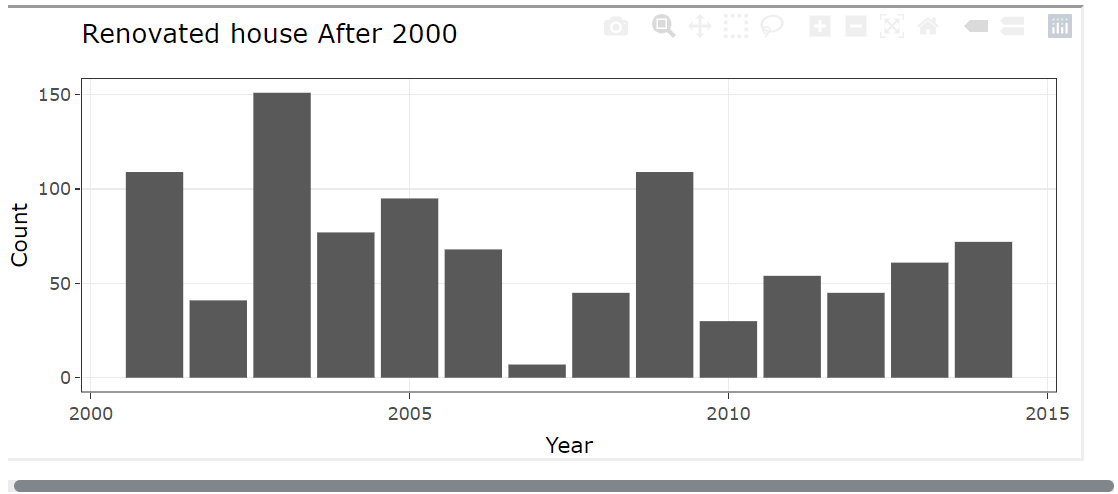

<span style="font-family:cursive; font-size:20px; color:Blue;">  Time series analysis </span>

Time series analysis is used to analyze and model data that is collected over time. For our case we can use it to identify trends, seasonal patterns, or any other pattern which are used in housing market data over time.

In below code ts function converts price data into time series object with monthly frequency starting from January 1950 to December 2014 since that was the year this data is between which we saw earlier in the graph. Data is now arranged in sequential order of time.

We can check if there is any seasonal fluctuations, trends or changes in the overall market, which can be useful in forecasting future prices and identify if there are any potential risks. We can also see if there are any changes in interest rates, economic consitions and policy changes.

In [25]:
ts_data <- ts(data$price, start=c(1950), end=c(2014), frequency=12)
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1950,313000,2384000,342000,420000,550000,490000,335000,482000,452500,640000,463000,1400000
1951,588500,365000,1200000,242500,419000,367500,257950,275000,750000,435000,626000,612500
1952,495000,285000,615000,698000,675000,790000,382500,499950,650000,625000,400000,604000
1953,440000,287200,403000,750000,335000,260000,308500,439950,235000,315000,437500,407500
1954,445700,838000,630000,550000,805000,284000,470000,430000,491500,785000,385000,295000
1955,555000,459990,625000,300000,625000,553000,379880,310000,775000,365000,331950,783500
1956,628000,560000,900000,531000,831000,780000,755000,705380,627000,865000,580000,410000
1957,485000,400000,549000,620000,405000,232000,800866,650000,823000,770000,524000,541125
1958,670000,384900,406100,1395000,736500,570000,787000,328000,435000,499000,501000,1090000
1959,400000,220000,657100,309950,300000,525888,740000,340000,398750,206000,1030000,600000


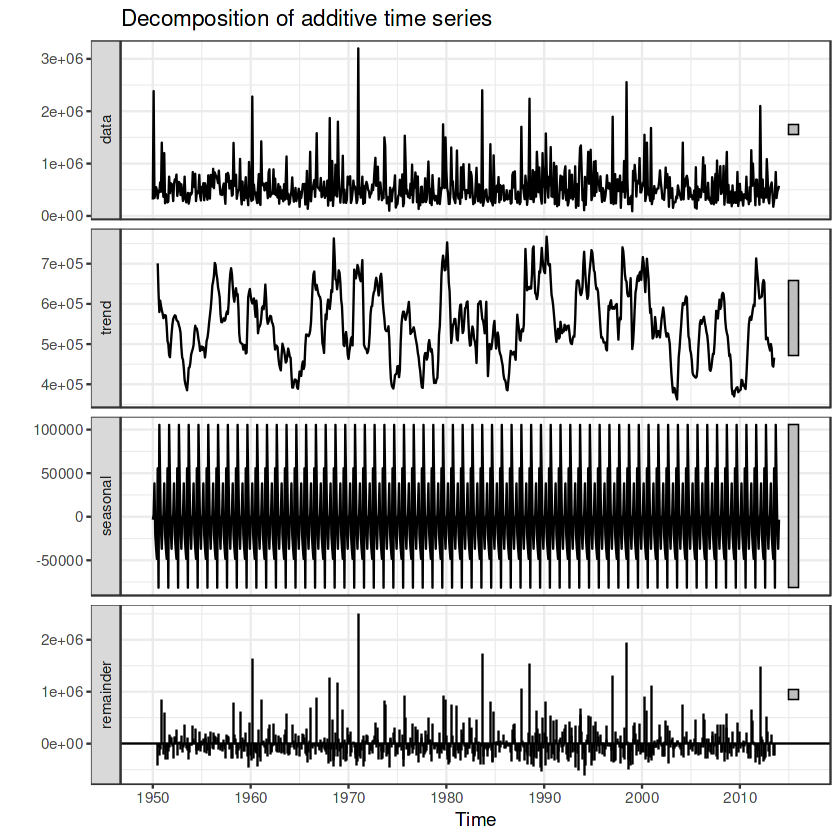

In [26]:
#to identify trend and seasonality
decom <- decompose(ts_data)
autoplot(decom)+theme_bw()

There are lot of data that is why we can't see much changes. In that case let us consider for the years 2000 to 2014 and check if we can find any interesting trends over the years.

In [27]:
ts_data_updated <- ts(data$price, start=c(2000), end=c(2014), frequency=12)
ts_data_updated

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,313000,2384000,342000,420000,550000,490000,335000,482000,452500,640000,463000,1400000
2001,588500,365000,1200000,242500,419000,367500,257950,275000,750000,435000,626000,612500
2002,495000,285000,615000,698000,675000,790000,382500,499950,650000,625000,400000,604000
2003,440000,287200,403000,750000,335000,260000,308500,439950,235000,315000,437500,407500
2004,445700,838000,630000,550000,805000,284000,470000,430000,491500,785000,385000,295000
2005,555000,459990,625000,300000,625000,553000,379880,310000,775000,365000,331950,783500
2006,628000,560000,900000,531000,831000,780000,755000,705380,627000,865000,580000,410000
2007,485000,400000,549000,620000,405000,232000,800866,650000,823000,770000,524000,541125
2008,670000,384900,406100,1395000,736500,570000,787000,328000,435000,499000,501000,1090000
2009,400000,220000,657100,309950,300000,525888,740000,340000,398750,206000,1030000,600000


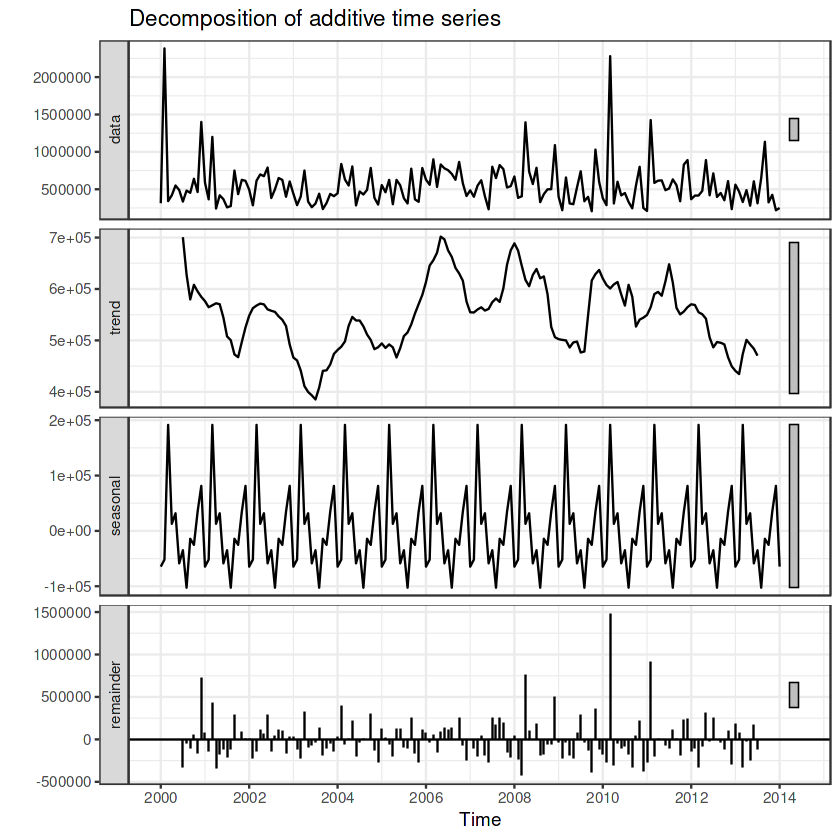

In [28]:
decom <- decompose(ts_data_updated)
autoplot(decom)+theme_bw()

In the above graph we can see that over time data is not increasing or decreasing but in year 2010 there are lot of houses which was added in the dataset, when it comes to trend, for the year 2004 which means the average price in that year was signigivantly lower compared to other years and as the year is increasing the average price increases and then decreases since the data is also decreasing over the end.

The remainder graph which is also known as residual plots, it captures the trend and seasonality in the data, we can see that for the year between 2000 and 2002, year 2008 and for the year 2010 there is a lot of variation in the data which is not accounted for by the model.

We cannot find any patterns in the seasonal plot, so let's try to plot them in another way and see if we can find anything relevant from it.

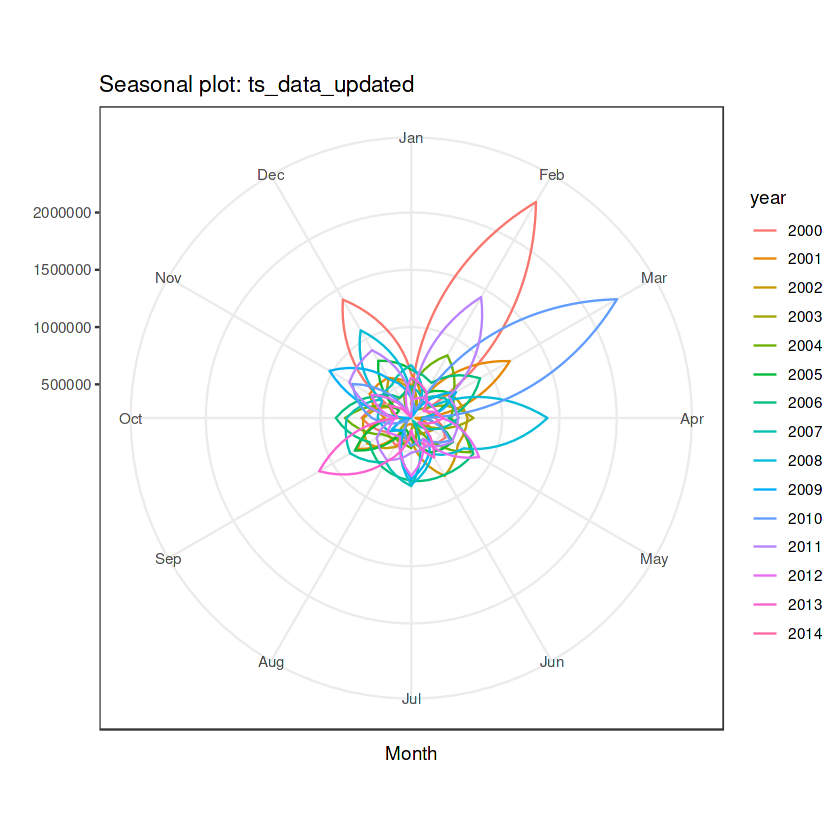

In [29]:
ggseasonplot(ts_data_updated, polar = TRUE)+theme_bw()

From the graph above we can clearly see that for the year 2000 average price for the month of February was most high compared to other months, equivalent for the year 2010 in the month of March.

Let's also plot for all the year.

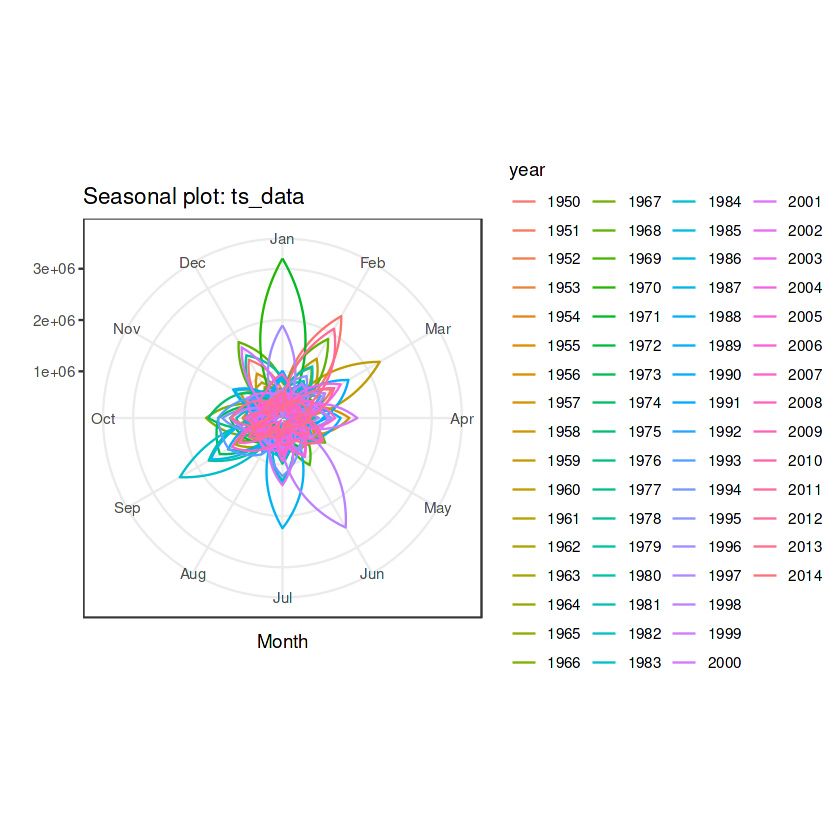

In [30]:
ggseasonplot(ts_data, polar = TRUE)+theme_bw()

It is interesting to note that for the month of January the average price is quite high from the year around 1966 to 1970.

Till now we can conclude that analysis over time from multiple perspective gives a comprehensive understanding of data. 

We saw Positive correlation between different features..As the number of bathroom increases the sqft_living also increases, negative correlation between yr_built and condition which says condition of the house decreases over the years. This correlation can be useful for real estate agents and home buyers who are trying to understand the market.

We also explored trends in the data over time and found signifcance change in trends and patterns. This can be helpful for stakeholders to understand how market has evolved over the time. 

All this analysis can be helpful for uncovering valuable insights to perform better decision making and drive better outcomes.

In the next section, let us train different models which can predict the house price given the other features of the house. 


<span style="font-family:cursive; font-size:20px; color:Blue;"> Training different models </span>

Let us first split the train and test dataset


In [31]:
set.seed(0)
#it calculates the random sample from the given data
train <- sample(nrow(data), floor(0.7*nrow(data)), replace = FALSE)
#it returns indices that were not selected for training set
test <- setdiff(1:nrow(data), train)
cat("Number of elements in the training set:", length(train), "\n")
cat("Number of elements in the test set:", length(test), "\n")


Number of elements in the training set: 3220 
Number of elements in the test set: 1380 


In [32]:
# creating data frames for the training and test sets
train_df <- data[train, ]
test_df <- data[test, ]


In [33]:
head(train_df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,cluster
<dttm>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<fct>
2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,1430,0,1927,0,8308 NE 176th Pl,Kenmore,WA 98028,USA,1
2014-05-20,372500.0,4,1.75,1590,10523,2.0,0,0,4,1590,0,1922,0,14556 Stone Ave N,Shoreline,WA 98133,USA,1
2014-06-09,379000.0,4,1.50,2020,7560,1.0,0,0,4,2020,0,1960,2001,11303 146th Ave SE,Renton,WA 98059,USA,1
2014-05-29,400000.0,4,1.50,1390,7200,1.0,0,0,3,1140,250,1965,1993,2150 N 128th St,Seattle,WA 98133,USA,1
2014-07-01,558653.8,3,2.50,1530,3210,1.5,0,0,5,1010,520,1928,1970,8519 28th Ave NW,Seattle,WA 98117,USA,1
2014-06-11,234000.0,3,2.00,1640,5280,1.5,0,0,5,1640,0,1910,0,28 M St NE,Auburn,WA 98002,USA,1


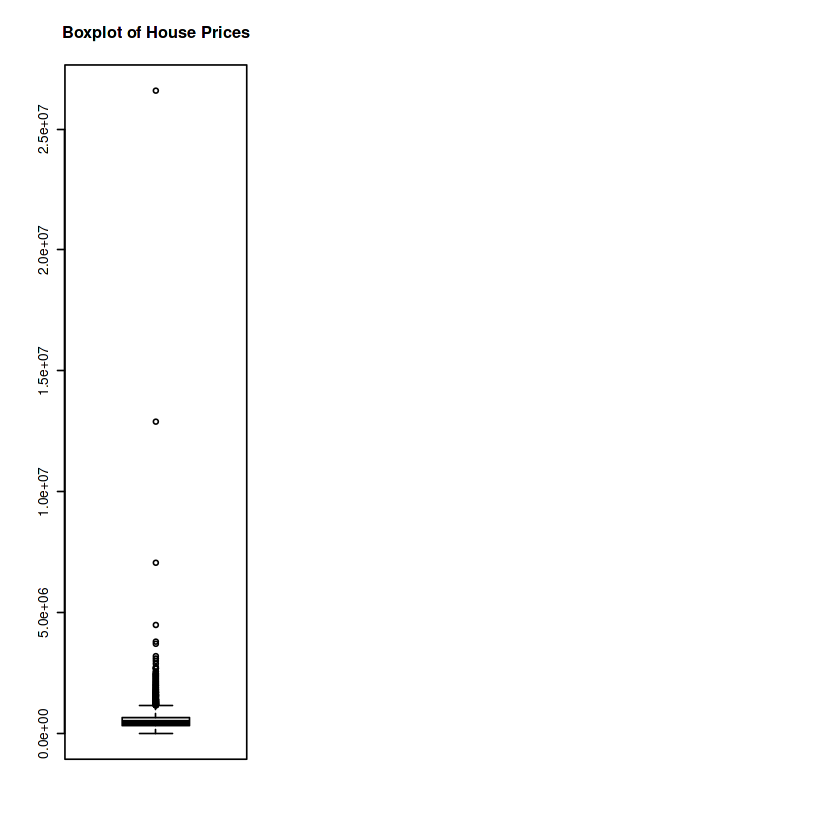

In [34]:
par(mfrow=c(1,3)) 
boxplot(train_df$price, main="Boxplot of House Prices")


From the above boxplot for house price in train_df we can see small sets of outliers.

In [35]:
head(test_df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,cluster
<dttm>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<fct>
2014-05-02,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2
2014-05-02,490000,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,1
2014-05-02,482000,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,1
2014-05-02,640000,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,1
2014-05-02,257950,3,1.75,1370,5858,1.0,0,0,3,1370,0,1987,2000,1605 S 245th Pl,Des Moines,WA 98198,USA,1
2014-05-02,275000,3,1.50,1180,10277,1.0,0,0,3,1180,0,1983,2009,12425 415th Ave SE,North Bend,WA 98045,USA,1


since these value are numeric and price value are quite high, lets scale them down.

In [36]:
#scale them down

num_cols <- which(sapply(data, is.numeric))

# initialize standard scaler
std_scaler <- preProcess(train_df, method="scale")

# applyi standard scaler to all numeric columns
train_df <- predict(std_scaler, train_df)
test_df <- predict(std_scaler, test_df)

In [37]:
#scaled train_df
head(train_df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,cluster
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>
2014-05-28,0.4860431,3.354493,1.273941,1.469589,0.56511306,2.788957,0,0,5.932116,1.624798,0.0000000,64.74144,0.000000,8308 NE 176th Pl,Kenmore,WA 98028,USA,1
2014-05-20,0.5840357,4.472657,2.229397,1.634019,0.29881336,3.718609,0,0,5.932116,1.806594,0.0000000,64.57346,0.000000,14556 Stone Ave N,Shoreline,WA 98133,USA,1
2014-06-09,0.5942269,4.472657,1.910912,2.075923,0.21467538,1.859305,0,0,5.932116,2.295170,0.0000000,65.85015,2.043041,11303 146th Ave SE,Renton,WA 98059,USA,1
2014-05-29,0.6271524,4.472657,1.910912,1.428482,0.20445274,1.859305,0,0,4.449087,1.295294,0.5429239,66.01813,2.034873,2150 N 128th St,Seattle,WA 98133,USA,1
2014-07-01,0.8759027,3.354493,3.184853,1.572357,0.09115185,2.788957,0,0,7.415145,1.147585,1.1292816,64.77504,2.011390,8519 28th Ave NW,Seattle,WA 98117,USA,1
2014-06-11,0.3668841,3.354493,2.547882,1.685403,0.14993201,2.788957,0,0,7.415145,1.863405,0.0000000,64.17030,0.000000,28 M St NE,Auburn,WA 98002,USA,1


Split them into x_train, y_train and x_test and y_test to learn in a model

In [38]:
# Separate target variable and input features for training dataset
x_train <- train_df[, c("bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated")]
y_train <- train_df$price

# Separate target variable and input features for testing dataset
x_test <- test_df[, c("bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated")]
y_test <- test_df$price


1. Using Random Forest

In [39]:
rf <- randomForest(y_train ~ ., data = x_train, ntree = 500)

predictions <- predict(rf, newdata = x_test)

rmse_rf <- sqrt(mean((y_test - predictions)^2))
cat("RMSE of Random Forest: ", rmse_rf)


RMSE of Random Forest:  0.3880006

2. Using Ridge Regression

In [40]:
# converting data to matrix format
X <- as.matrix(x_train)
Y <- as.matrix(y_train)

fit <- cv.glmnet(X, Y, alpha = 0, nfolds = 10)

# fit the ridge regression model
ridge <- glmnet(X, Y, alpha = 0, lambda = fit$lambda.min)

X_test <- as.matrix(x_test)
predictions <- predict(ridge, newx = X_test)

rmse_rr <- sqrt(mean((y_test - predictions)^2))
cat("RMSE of Ridge Regression: ", rmse_rr)


RMSE of Ridge Regression:  0.3596269

3. Using Decision Tree

In [41]:
# training the model
dt <- rpart(y_train ~ ., data = x_train)
 
predictions <- predict(dt, newdata = x_test)

rmse_dt <- sqrt(mean((y_test - predictions)^2))
cat("RMSE of decision tree: ", rmse_dt)


RMSE of decision tree:  0.4464007

4. Using Lasso Regression

In [42]:
#converting them as matrix
X <- as.matrix(x_train)
Y <- as.matrix(y_train)
lasso <- glmnet(X, Y, alpha = 1)
X_test <- as.matrix(x_test)
 
predictions <- predict(lasso, newx = X_test)

# calculate the RMSE
rmse_lr <- sqrt(mean((y_test - predictions)^2))
cat("RMSE of Lasso regression: ", rmse_lr)


RMSE of Lasso regression:  0.3840802

Let's try comparing different models that we computed before and see which performs better

In [57]:
# create a data frame with the RMSE values
rmse_df <- data.frame(
  Model = c("Lasso", "Ridge", "Decision Tree", "Random Forest"),
  RMSE = c(rmse_lr, rmse_rr, rmse_dt, rmse_rf)
)
colors <- c("#FFA07A", "#87CEEB", "#20B2AA", "#9370DB")

# create bar plot using Plotly
plot2 <- plot_ly(rmse_df, x = ~Model, y = ~RMSE, type = "bar", marker = list(color = colors)) %>%
  layout(title = "Comparison of Regression Models", xaxis = list(title = "Model"), yaxis = list(title = "RMSE"))

saveWidget(plot2, "plot2.html")
display_html('<iframe src="plot2.html" width=100% height=300></iframe>')

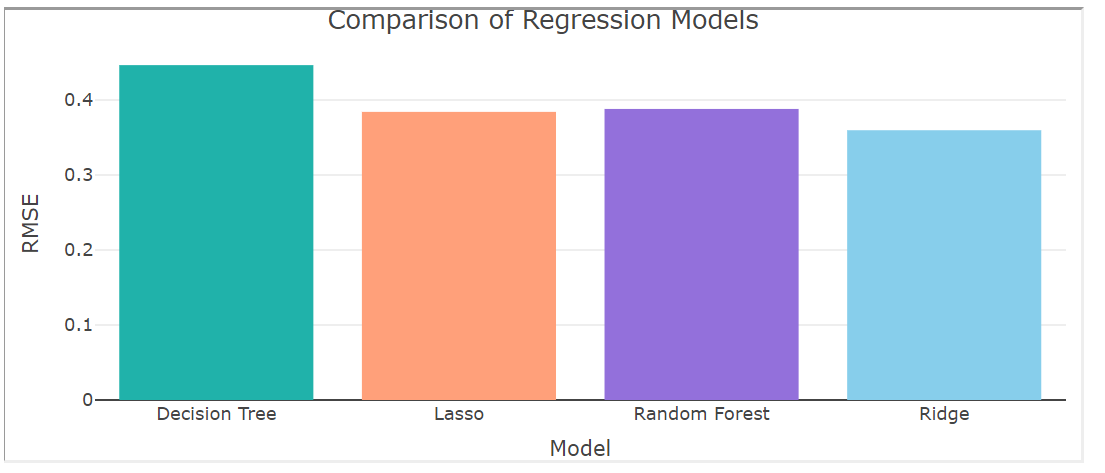

From the above graph we can see that Ridge regression has lowers rmse score which means it will be the best model to use to predict the house price.

For different models lets try to plot the boxplot to explore and analyze data to find information about first quartile, median, third quartile, and maximum. We can see if the data is symmetric or skewed, or if has any outliers or if it represents any error or unusual occurences in the data.

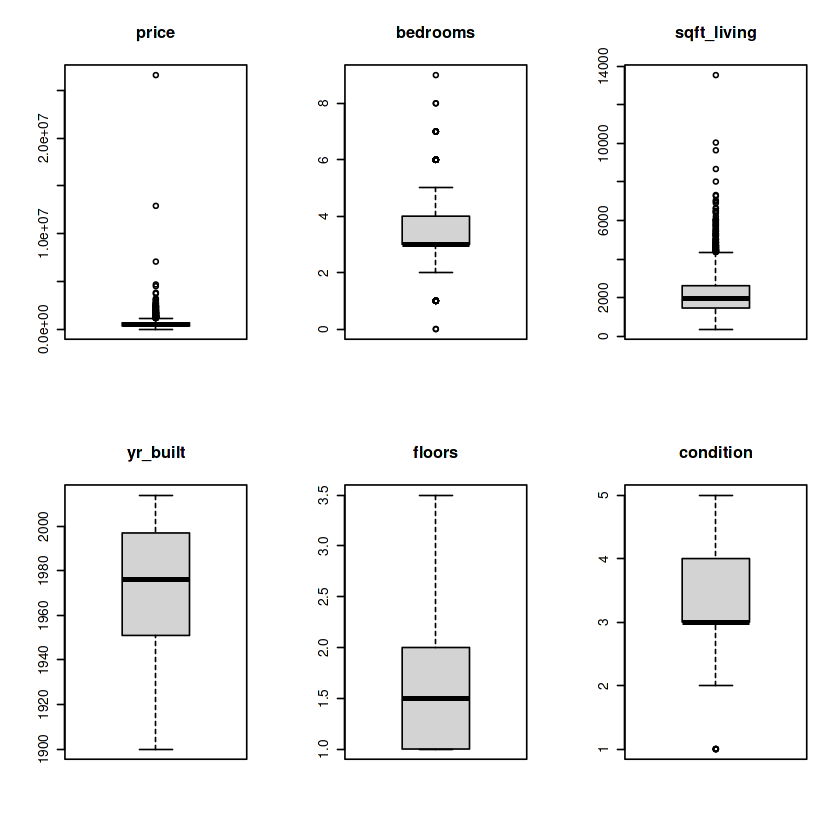

In [44]:
par(mfrow=c(2,3))  # divide graph area in 2 rows 3 columns

boxplot(data$price, main="price")
boxplot(data$bedrooms, main="bedrooms")
boxplot(data$sqft_living, main="sqft_living")
boxplot(data$yr_built, main="yr_built")
boxplot(data$floors, main="floors")
boxplot(data$condition, main="condition")


From the above graph we can see that:
1. bedroom -  the median is at the lower quartile which is 2, we can say that more than 50% of houses has 3 bedrooms. 
2. condition - median is again at the lower quartile at 3, which means that this variable is skewed towards the lower values. In the context, we can say that with values ranging from 1 being the poor contidion and 5 benig the excellent condition. most of the houses are falling in 3, which is the average condition of the house.
3. yr_built - almost symmetric ranging from the year 1960 to 2000. Values are evenly distributed which means there is no concentraition of buildings built in specific period.
4. sqft_living and floors are almost evenly distributed as well.


<span style="font-family:cursive; font-size:20px; color:Blue;"> Detecting Outliers - Tukey's Method</span>

Since our main aim in this notebook is to predict the prices, from the boxplot graph we saw that there are some outliers present in the 'prices'. To see how many of the houses price are lying the range of outliers we can use tukey's method. 

Tukey's method detects the outliers that lie outside the whiskers, it is is the difference between the third quartile (Q3) and the first quartile (Q1) of price column in dataset.

An observation is considered an outlier, if it falls below Q1 - 1.5IQR or above Q3 + 1.5IQR and that values that falls outside of this range are considered to be unusually high or low relative to the rest of the price column in data.

Q1 is used to calculate the first quantile, we want to calculate the value at the 25th percentile of the price variable.

Q3 is used to calculare the third quartile of the price variable using quantile function to calculate at the 75th percentile of the price variable.

IQR caluclates the differences between the Q1 and Q3.

Data points that are greater than the upper bound or less than the lower bound are considered outliers.

The term 1.5 is a scaling factor used in Tukey's method for outlier detection. It is used to determine the threshold values that define outliers.

In [45]:
# Tukey's method for outlier detection
Q1 <- quantile(data$price, 0.25)
Q3 <- quantile(data$price, 0.75)
IQR <- Q3 - Q1
upper <- Q3 + 1.5 * IQR
lower <- Q1 - 1.5 * IQR


outliers <- data$price > upper | data$price < lower


In [46]:
#number true outliers
num_outlier <- sum(outliers)
num_outlier

[1] 240

In [47]:
#number of false outliers
not_outlier <- sum(!outliers)
not_outlier

[1] 4360

We can see that 240 houses are sold for the range that is outside the actual price

As a conclusion we can say that finding correlation can be useful for real estate agents and home
buyers who are trying to understand the market and exploring trends in the data over time and finding
significance change in trends and patterns can be helpful for stakeholders to understand how market
has evolved over the time.

references:

https://www.itl.nist.gov/div898/handbook/prc/section4/prc471.htm

https://www.linkedin.com/pulse/outlier-treatment-tukeys-method-r-swanand-marathe/

https://rpubs.com/omarp120/577758

https://towardsdatascience.com/practical-guide-to-outlier-detection-methods-6b9f947a161e

The figure of the house is taken from https://www.rocketmortgage.com/resources-cmsassets/RocketMortgage.com/Article_Images/Large_Images/TypesOfHomes/types-of-homes-hero.jpg